<a href="https://colab.research.google.com/github/DiegoDuran03/1/blob/main/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analisis de Indicadores Financieros de Distintas Entidades

Esta base de datos contiene indicadores financieros como la condición financiera, la relación capital/activos, gastos/activos y préstamos/activos de distintas entidades. Permite analizar su solvencia, eficiencia y apalancamiento en función de su condición financiera.

##Descripcion de Variables:

TotCap/Assets: Proporción del capital total respecto a los activos totales de la entidad, indicando la solvencia financiera.

TotExp/Assets: Proporción de los gastos totales respecto a los activos totales, reflejando la eficiencia operativa.

TotLns&Lses/Assets: Proporción de los préstamos y arrendamientos totales respecto a los activos totales, midiendo el nivel de apalancamiento o deuda de la entidad.

Financial Condition: Indicador binario que representa la condición financiera de la entidad, donde 1 podría significar buena condición y 0 mala condición.

In [68]:
path="https://raw.githubusercontent.com/tec03/Datasets/main/datasets/banks.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [69]:
df = pd.read_csv(path)
df

,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69
5,6,1,9.1,0.13,0.74
6,7,1,11.9,0.10,0.79
7,8,1,8.1,0.13,0.63
8,9,1,9.3,0.16,0.72
9,10,1,1.1,0.16,0.57


In [70]:
df.shape

(20, 5)

##Pregunta 1: ¿Cuál es la relación entre el Capital y Gastos?

In [71]:
df['TotCap/Assets'].value_counts(normalize=True) * 100

,proportion
TotCap/Assets,
9.7,5.0
1.0,5.0
14.0,5.0
7.2,5.0
18.3,5.0
12.5,5.0
9.6,5.0
7.9,5.0
9.8,5.0


In [72]:
df['TotCap/Assets'].mean()

9.320000000000002

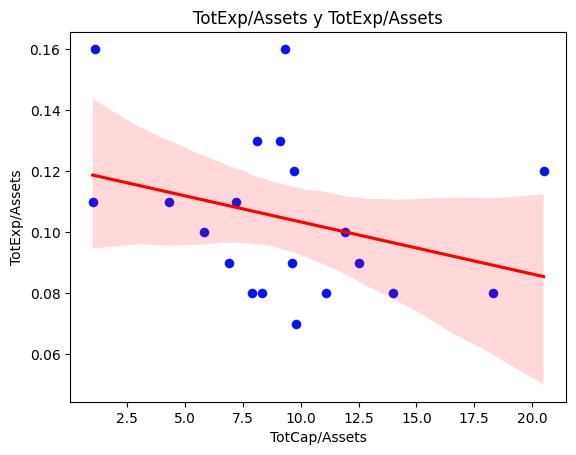

In [91]:
import matplotlib.pyplot as plt
sns.scatterplot(x='TotCap/Assets', y='TotExp/Assets', data=df)
sns.regplot(x='TotCap/Assets', y='TotExp/Assets', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('TotExp/Assets y TotExp/Assets')
plt.show()

##Pregunta 2: ¿ Cuál es la relación de distribucion Gastos y Financial Condition?


In [74]:
print(df.columns)

Index(['Obs', 'Financial Condition', 'TotCap/Assets', 'TotExp/Assets',
       'TotLns&Lses/Assets'],
      dtype='object')


Index(['Obs', 'Financial Condition', 'TotCap/Assets', 'TotExp/Assets',
       'TotLns&Lses/Assets'],
      dtype='object')
Promedio de TotExp/Assets para Financial Condition = 1: 0.12099999999999997
Promedio de TotExp/Assets para Financial Condition = 0: 0.088


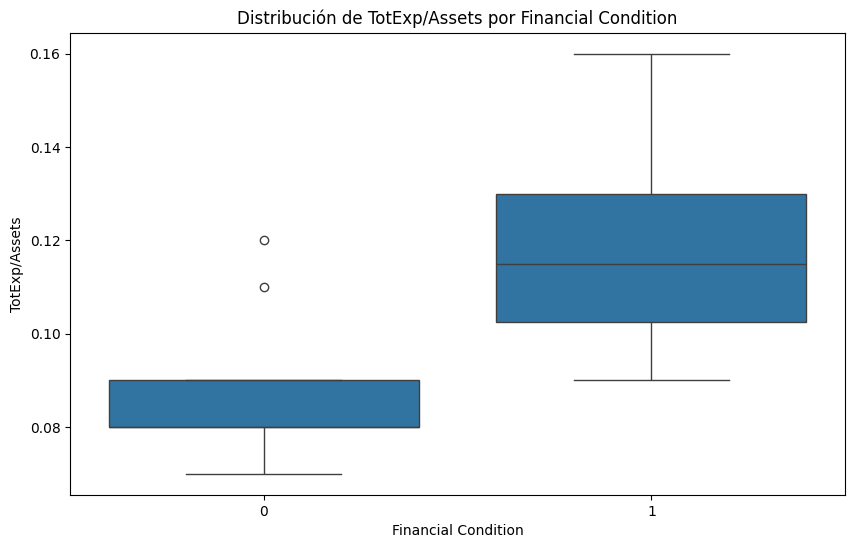

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/banks.csv'

df = pd.read_csv(path)

df.columns = df.columns.str.strip()
print(df.columns)

financial_condition_col = 'Financial Condition'

mean_totexp_assets_condition_1 = df[df[financial_condition_col] == 1]['TotExp/Assets'].mean()
mean_totexp_assets_condition_0 = df[df[financial_condition_col] == 0]['TotExp/Assets'].mean()

print(f"Promedio de TotExp/Assets para {financial_condition_col} = 1: {mean_totexp_assets_condition_1}")
print(f"Promedio de TotExp/Assets para {financial_condition_col} = 0: {mean_totexp_assets_condition_0}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=financial_condition_col, y='TotExp/Assets', data=df)
plt.title(f'Distribución de TotExp/Assets por {financial_condition_col}')
plt.xlabel(financial_condition_col)
plt.ylabel('TotExp/Assets')

plt.show()

Coeficiente de correlación entre Condition y TotLns&Lses/Assets: 0.5233317861297865


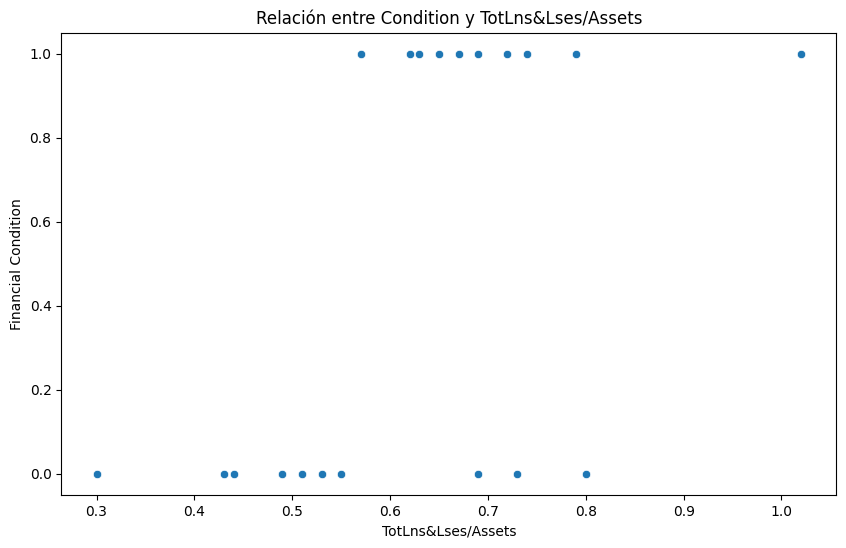

In [88]:
df.columns = df.columns.str.strip()

# Calcular la correlación entre Condition y TotLns&Lses/Assets
correlation = df['Financial Condition'].corr(df['TotLns&Lses/Assets'])
print(f"Coeficiente de correlación entre Condition y TotLns&Lses/Assets: {correlation}")

# Visualizar la relación entre Condition y TotLns&Lses/Assets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotLns&Lses/Assets', y='Financial Condition', data=df)

plt.title('Relación entre Condition y TotLns&Lses/Assets')
plt.xlabel('TotLns&Lses/Assets')
plt.ylabel('Financial Condition')

# Mostrar el gráfico
plt.show()

In [89]:
avg_TotExp_assets_condition_1 = df[df['TotCap/Assets'] == df['TotExp/Assets']]['TotExp/Assets'].mean()
avg_TotExp_assets_condition_2 = df[df['TotCap/Assets'] == df['TotLns&Lses/Assets']]['TotExp/Assets'].mean()

print("Promedio de TotExp/Assets cuando TotCap/Assets es igual a TotExp/Assets:", avg_TotExp_assets_condition_1)
print("Promedio de TotExp/Assets cuando TotCap/Assets es igual a TotLns&Lses/Assets:", avg_TotExp_assets_condition_2)

Promedio de TotExp/Assets cuando TotCap/Assets es igual a TotExp/Assets: nan
Promedio de TotExp/Assets cuando TotCap/Assets es igual a TotLns&Lses/Assets: nan


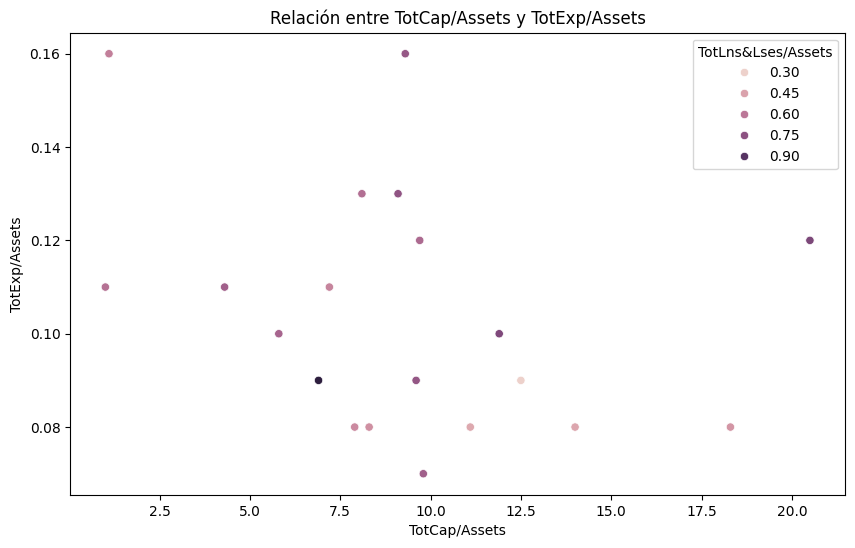

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotCap/Assets', y='TotExp/Assets', data=df, hue='TotLns&Lses/Assets')
plt.title('Relación entre TotCap/Assets y TotExp/Assets')
plt.xlabel('TotCap/Assets')
plt.ylabel('TotExp/Assets')
plt.show()